In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Dataset 1

In [2]:
house_prices = pd.read_csv(".\\House_Prices_2010-2020.csv")
house_prices

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA
0,ABBOTSFORD,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1205000,1375000.0,15.0,64.0,5.1
1,ABERFELDIE,1046500,994000,852500,947500,1045000,1207500,1300000,1471000,1500000,1390000,1620000,1700000.0,17.0,55.0,4.5
2,AINTREE,-,-,-,-,-,590000,607500,571000,568500,593000,685000,717500.0,16.0,NaN,NaN
3,AIREYS INLET,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1125000,1522000.0,14.0,86.0,6.4
4,AIRPORT WEST,575000,557500,495000,532000,575000,635000,742000,845000,845000,795000,807500,889500.0,2.0,40.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,YARRAM,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,343000.0,8.0,57.0,4.6
782,YARRAVILLE,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,974000,1038500,1017500.0,7.0,61.0,4.8
783,YARRAWONGA,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,451000,539500.0,20.0,52.0,4.3
784,YEA,240000,270000,255000,260000,255000,260000,305000,386500,392500,441000,422500,515000.0,-4.0,76.0,5.8


In [3]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Locality              786 non-null    object 
 1   2010                  786 non-null    object 
 2   2011                  786 non-null    object 
 3   2012                  786 non-null    object 
 4   2013                  786 non-null    object 
 5   2014                  786 non-null    object 
 6   2015                  786 non-null    object 
 7   2016                  786 non-null    object 
 8   2017                  786 non-null    object 
 9   2018                  786 non-null    int64  
 10  2019                  786 non-null    int64  
 11  2020                  786 non-null    int64  
 12  Estimated 2021        776 non-null    float64
 13  % Change (2019-2020)  785 non-null    float64
 14  % Change (2010-2020)  772 non-null    float64
 15  Growth PA             7

### Data Cleaning

Converting data into numeric values

In [4]:
numeric_cols = house_prices.columns.drop("Locality")
house_prices[numeric_cols] = house_prices[numeric_cols].apply(pd.to_numeric, errors = "coerce", downcast = "float")
house_prices.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786 entries, 0 to 785
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Locality              786 non-null    object 
 1   2010                  768 non-null    float32
 2   2011                  772 non-null    float32
 3   2012                  778 non-null    float32
 4   2013                  779 non-null    float32
 5   2014                  781 non-null    float32
 6   2015                  782 non-null    float32
 7   2016                  783 non-null    float32
 8   2017                  785 non-null    float32
 9   2018                  786 non-null    float32
 10  2019                  786 non-null    float32
 11  2020                  786 non-null    float32
 12  Estimated 2021        776 non-null    float32
 13  % Change (2019-2020)  785 non-null    float32
 14  % Change (2010-2020)  772 non-null    float32
 15  Growth PA             7

Dealing with Null values

In [5]:
nan_vals = house_prices[house_prices.isna().any(axis = 1)]
nan_vals

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA
2,AINTREE,NaN,NaN,NaN,NaN,NaN,590000.0,607500.0,571000.0,568500.0,593000.0,685000.0,717500.0,16.0,NaN,NaN
10,ALLANSFORD,250500.0,332000.0,257500.0,310000.0,242500.0,259000.0,275000.0,280000.0,245000.0,300000.0,362000.0,NaN,21.0,45.0,3.8
21,ARMSTRONG CREEK,NaN,205000.0,362500.0,467500.0,441500.0,440000.0,450000.0,471000.0,535000.0,535000.0,555000.0,597500.0,4.0,0.0,NaN
54,BEACONSFIELD UPPER,472000.0,437500.0,535000.0,470000.0,507500.0,602500.0,630000.0,725500.0,903500.0,787500.0,818000.0,NaN,4.0,73.0,5.6
84,BONSHAW,NaN,NaN,NaN,NaN,309000.0,309000.0,322500.0,235000.0,400000.0,379000.0,435000.0,510000.0,15.0,NaN,NaN
161,CLYDE NORTH,NaN,300000.0,395000.0,409000.0,380000.0,410000.0,491000.0,550000.0,595000.0,571500.0,610000.0,652000.0,7.0,0.0,NaN
162,COBBLEBANK,NaN,NaN,400000.0,335500.0,323000.0,318000.0,328000.0,374000.0,455500.0,480500.0,510000.0,516000.0,6.0,NaN,NaN
187,CRANBOURNE SOUTH,NaN,NaN,NaN,NaN,455000.0,685000.0,685000.0,600000.0,425000.0,632500.0,634000.0,620000.0,0.0,NaN,NaN
196,CURLEWIS,NaN,153000.0,439500.0,387000.0,382500.0,387000.0,406500.0,430000.0,495000.0,560000.0,570000.0,570000.0,2.0,0.0,NaN
203,DEANSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340000.0,352500.0,352500.0,352500.0,695000.0,NaN,NaN,NaN


In [6]:
house_prices = house_prices.fillna(0)
house_prices

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA
0,ABBOTSFORD,736000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1205000.0,1375000.0,15.0,64.0,5.1
1,ABERFELDIE,1046500.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1500000.0,1390000.0,1620000.0,1700000.0,17.0,55.0,4.5
2,AINTREE,0.0,0.0,0.0,0.0,0.0,590000.0,607500.0,571000.0,568500.0,593000.0,685000.0,717500.0,16.0,0.0,0.0
3,AIREYS INLET,606000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1125000.0,1522000.0,14.0,86.0,6.4
4,AIRPORT WEST,575000.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,807500.0,889500.0,2.0,40.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,YARRAM,166000.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,343000.0,8.0,57.0,4.6
782,YARRAVILLE,647000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,974000.0,1038500.0,1017500.0,7.0,61.0,4.8
783,YARRAWONGA,297000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,451000.0,539500.0,20.0,52.0,4.3
784,YEA,240000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,441000.0,422500.0,515000.0,-4.0,76.0,5.8


Filling in empty values

In [7]:
#1. Filling in empty values in the '% Change (2010-2020)' column


#Retrieving the first non-zero median price for each suburb
suburbs = house_prices["Locality"].count()
rows = range(0, suburbs)
row = 0
firstnonzero_val = []

for row in rows:
    nonzero_year = house_prices.iloc[row, 1:12].ne(0).idxmax()
    firstnonzero_val.append(house_prices[nonzero_year][row])


house_prices["First Nonzero Value"] = firstnonzero_val
house_prices








,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA,First Nonzero Value
0,ABBOTSFORD,736000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1205000.0,1375000.0,15.0,64.0,5.1,736000.0
1,ABERFELDIE,1046500.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1500000.0,1390000.0,1620000.0,1700000.0,17.0,55.0,4.5,1046500.0
2,AINTREE,0.0,0.0,0.0,0.0,0.0,590000.0,607500.0,571000.0,568500.0,593000.0,685000.0,717500.0,16.0,0.0,0.0,590000.0
3,AIREYS INLET,606000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1125000.0,1522000.0,14.0,86.0,6.4,606000.0
4,AIRPORT WEST,575000.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,807500.0,889500.0,2.0,40.0,3.5,575000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,YARRAM,166000.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,343000.0,8.0,57.0,4.6,166000.0
782,YARRAVILLE,647000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,974000.0,1038500.0,1017500.0,7.0,61.0,4.8,647000.0
783,YARRAWONGA,297000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,451000.0,539500.0,20.0,52.0,4.3,297000.0
784,YEA,240000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,441000.0,422500.0,515000.0,-4.0,76.0,5.8,240000.0


In [8]:
#2. Calculating the % change and updating the existing column

house_prices["% Change (2010-2020)"] = round((house_prices["2020"]-house_prices["First Nonzero Value"])/house_prices["First Nonzero Value"]*100)
house_prices

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA,First Nonzero Value
0,ABBOTSFORD,736000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1205000.0,1375000.0,15.0,64.0,5.1,736000.0
1,ABERFELDIE,1046500.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1500000.0,1390000.0,1620000.0,1700000.0,17.0,55.0,4.5,1046500.0
2,AINTREE,0.0,0.0,0.0,0.0,0.0,590000.0,607500.0,571000.0,568500.0,593000.0,685000.0,717500.0,16.0,16.0,0.0,590000.0
3,AIREYS INLET,606000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1125000.0,1522000.0,14.0,86.0,6.4,606000.0
4,AIRPORT WEST,575000.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,807500.0,889500.0,2.0,40.0,3.5,575000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,YARRAM,166000.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,343000.0,8.0,57.0,4.6,166000.0
782,YARRAVILLE,647000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,974000.0,1038500.0,1017500.0,7.0,61.0,4.8,647000.0
783,YARRAWONGA,297000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,451000.0,539500.0,20.0,52.0,4.3,297000.0
784,YEA,240000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,441000.0,422500.0,515000.0,-4.0,76.0,5.8,240000.0


In [9]:
#3. Filling in missing values in the 'Growth PA' column

house_prices["Growth PA"] = round(((house_prices["2020"]/house_prices["First Nonzero Value"])**(1/10)-1)*100, 1)
house_prices


,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA,First Nonzero Value
0,ABBOTSFORD,736000.0,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1205000.0,1375000.0,15.0,64.0,5.1,736000.0
1,ABERFELDIE,1046500.0,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1500000.0,1390000.0,1620000.0,1700000.0,17.0,55.0,4.5,1046500.0
2,AINTREE,0.0,0.0,0.0,0.0,0.0,590000.0,607500.0,571000.0,568500.0,593000.0,685000.0,717500.0,16.0,16.0,1.5,590000.0
3,AIREYS INLET,606000.0,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1125000.0,1522000.0,14.0,86.0,6.4,606000.0
4,AIRPORT WEST,575000.0,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,807500.0,889500.0,2.0,40.0,3.5,575000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,YARRAM,166000.0,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,343000.0,8.0,57.0,4.6,166000.0
782,YARRAVILLE,647000.0,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,974000.0,1038500.0,1017500.0,7.0,61.0,4.8,647000.0
783,YARRAWONGA,297000.0,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,451000.0,539500.0,20.0,52.0,4.3,297000.0
784,YEA,240000.0,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,441000.0,422500.0,515000.0,-4.0,76.0,5.8,240000.0


## Dataset 2

### Data Cleaning

In [10]:
house_prices_2021 = pd.read_csv(".\\House_Prices_2021.csv")
house_prices_2021

,Median House Prices 4TH quarter 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Change %,Change %.1
0,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales,No of sales,No of sales,No of Sales,Oct - Dec 20,Jul-Aug 21
1,NaN,NaN,NaN,NaN,NaN,NaN,Apr - Jun 2021,Jul- Sep 2021,Oct - Dec 2021,YTD,Oct - Dec 21,Oct - Dec 21
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABBOTSFORD,1230000,1370000,1470000,1107500,1340000,17,11,25,93,8.9,21
4,ABERFELDIE,1620000,1788000,1830000,1790000,2283000,11,8,18,68,40.9,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAVILLE,1062500,1151500,1100000,1200000,1285000,59,52,101,353,20.9,7.1
799,YARRAWONGA,476300,540000,529000,597500,586000,65,36,57,273,23,-1.9
800,YEA,496900,580000,540000,560000,617500,14,8,8,45,24.3,10.3
801,YINNAR,270000,470000,525000,300000,364000,5,3,6,24,34.8,21.3


Updating column names

In [11]:
house_prices_2021.drop([2,802], axis=0, inplace=True)
house_prices_2021

,Median House Prices 4TH quarter 2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Change %,Change %.1
0,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales,No of sales,No of sales,No of Sales,Oct - Dec 20,Jul-Aug 21
1,NaN,NaN,NaN,NaN,NaN,NaN,Apr - Jun 2021,Jul- Sep 2021,Oct - Dec 2021,YTD,Oct - Dec 21,Oct - Dec 21
3,ABBOTSFORD,1230000,1370000,1470000,1107500,1340000,17,11,25,93,8.9,21
4,ABERFELDIE,1620000,1788000,1830000,1790000,2283000,11,8,18,68,40.9,27.5
5,AINTREE,687800,701500,695000,735000,742500,43,33,38,212,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
797,YARRAM,300000,343000,340000,352500,420000,17,18,10,81,40,19.1
798,YARRAVILLE,1062500,1151500,1100000,1200000,1285000,59,52,101,353,20.9,7.1
799,YARRAWONGA,476300,540000,529000,597500,586000,65,36,57,273,23,-1.9
800,YEA,496900,580000,540000,560000,617500,14,8,8,45,24.3,10.3


In [12]:
house_prices_2021[1:2].fillna(" ", inplace=True)
house_prices_2021.columns = house_prices_2021.iloc[0] + " " + house_prices_2021.iloc[1]
house_prices_2021.rename(columns= {"Oct - Dec 20 Oct - Dec 21":"% Change Oct - Dec 20 Oct - Dec 21", "Jul-Aug 21 Oct - Dec 21": "% Change Jul-Aug 21 Oct - Dec 21"}, inplace=True)
house_prices_2021.drop([0,1], axis=0, inplace=True)
house_prices_2021.reset_index(drop=True, inplace=True)
house_prices_2021

C:\Users\Hannifa\AppData\Local\Temp\ipykernel_10872\1918046329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_prices_2021[1:2].fillna(" ", inplace=True)


,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21
0,ABBOTSFORD,1230000,1370000,1470000,1107500,1340000,17,11,25,93,8.9,21
1,ABERFELDIE,1620000,1788000,1830000,1790000,2283000,11,8,18,68,40.9,27.5
2,AINTREE,687800,701500,695000,735000,742500,43,33,38,212,8,1
3,AIREYS INLET,1365000,1601000,1360000,1835000,2030000,5,8,7,38,48.7,10.6
4,AIRPORT WEST,830000,887500,955000,990000,1020000,43,30,35,180,22.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
794,YARRAM,300000,343000,340000,352500,420000,17,18,10,81,40,19.1
795,YARRAVILLE,1062500,1151500,1100000,1200000,1285000,59,52,101,353,20.9,7.1
796,YARRAWONGA,476300,540000,529000,597500,586000,65,36,57,273,23,-1.9
797,YEA,496900,580000,540000,560000,617500,14,8,8,45,24.3,10.3


In [13]:
house_prices_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   SUBURB                              799 non-null    object
 1   Oct - Dec 20                        799 non-null    object
 2   Jan - Mar 2021                      799 non-null    object
 3   Apr - Jun 2021                      799 non-null    object
 4   Jul-Aug 21                          799 non-null    object
 5   Oct - Dec 21                        799 non-null    object
 6   No of sales  Apr - Jun 2021         799 non-null    object
 7   No of sales  Jul- Sep 2021          799 non-null    object
 8   No of sales  Oct - Dec 2021         799 non-null    object
 9   No of Sales  YTD                    799 non-null    object
 10  % Change Oct - Dec 20 Oct - Dec 21  788 non-null    object
 11  % Change Jul-Aug 21 Oct - Dec 21    783 non-null    object

Replacing strings with numeric values

In [14]:
house_prices_2021[house_prices_2021.isin(["-"]).any(axis=1)]

,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21
85,BONNIE BROOK,-,-,677000,670000,701000,5,1,1,7,0,4.6
444,MAMBOURIN,-,623000,560000,580000,627500,2,7,10,20,0,8.2


In [15]:
house_prices_2021.replace(to_replace="-", value=0, inplace=True)
house_prices_2021[house_prices_2021.isin(["-"]).any(axis=1)]

,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21


Converting data into numeric values

In [16]:
numeric_cols = house_prices_2021.columns.drop('SUBURB  ')
house_prices_2021[numeric_cols] = house_prices_2021[numeric_cols].apply(pd.to_numeric, errors = "coerce", downcast = "float")
house_prices_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SUBURB                              799 non-null    object 
 1   Oct - Dec 20                        799 non-null    float32
 2   Jan - Mar 2021                      799 non-null    float32
 3   Apr - Jun 2021                      799 non-null    float32
 4   Jul-Aug 21                          799 non-null    float32
 5   Oct - Dec 21                        799 non-null    float32
 6   No of sales  Apr - Jun 2021         799 non-null    float32
 7   No of sales  Jul- Sep 2021          799 non-null    float32
 8   No of sales  Oct - Dec 2021         799 non-null    float32
 9   No of Sales  YTD                    792 non-null    float32
 10  % Change Oct - Dec 20 Oct - Dec 21  788 non-null    float32
 11  % Change Jul-Aug 21 Oct - Dec 21    783 non-n

Filling in empty values

In [17]:
suburbs2 = house_prices_2021["SUBURB  "].count()
rows2 = range(0, suburbs2)
row2 = 0
firstnonzero_val2 = []

for row2 in rows2:
    nonzero_year2 = house_prices_2021.iloc[row2, 1:6].ne(0).idxmax()
    firstnonzero_val2.append(house_prices_2021[nonzero_year2][row2])


house_prices_2021["First Nonzero Value"] = firstnonzero_val2
house_prices_2021

,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21,First Nonzero Value
0,ABBOTSFORD,1230000.0,1370000.0,1470000.0,1107500.0,1340000.0,17.0,11.0,25.0,93.0,8.900000,21.000000,1230000.0
1,ABERFELDIE,1620000.0,1788000.0,1830000.0,1790000.0,2283000.0,11.0,8.0,18.0,68.0,40.900002,27.500000,1620000.0
2,AINTREE,687800.0,701500.0,695000.0,735000.0,742500.0,43.0,33.0,38.0,212.0,8.000000,1.000000,687800.0
3,AIREYS INLET,1365000.0,1601000.0,1360000.0,1835000.0,2030000.0,5.0,8.0,7.0,38.0,48.700001,10.600000,1365000.0
4,AIRPORT WEST,830000.0,887500.0,955000.0,990000.0,1020000.0,43.0,30.0,35.0,180.0,22.900000,3.000000,830000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,YARRAM,300000.0,343000.0,340000.0,352500.0,420000.0,17.0,18.0,10.0,81.0,40.000000,19.100000,300000.0
795,YARRAVILLE,1062500.0,1151500.0,1100000.0,1200000.0,1285000.0,59.0,52.0,101.0,353.0,20.900000,7.100000,1062500.0
796,YARRAWONGA,476300.0,540000.0,529000.0,597500.0,586000.0,65.0,36.0,57.0,273.0,23.000000,-1.900000,476300.0
797,YEA,496900.0,580000.0,540000.0,560000.0,617500.0,14.0,8.0,8.0,45.0,24.299999,10.300000,496900.0


In [18]:
house_prices_2021["% Change Oct - Dec 20 Oct - Dec 21"] = round((house_prices_2021["Oct - Dec 21  "]-house_prices_2021["First Nonzero Value"])/house_prices_2021["First Nonzero Value"]*100, 1)
house_prices_2021

,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21,First Nonzero Value
0,ABBOTSFORD,1230000.0,1370000.0,1470000.0,1107500.0,1340000.0,17.0,11.0,25.0,93.0,8.900000,21.000000,1230000.0
1,ABERFELDIE,1620000.0,1788000.0,1830000.0,1790000.0,2283000.0,11.0,8.0,18.0,68.0,40.900002,27.500000,1620000.0
2,AINTREE,687800.0,701500.0,695000.0,735000.0,742500.0,43.0,33.0,38.0,212.0,8.000000,1.000000,687800.0
3,AIREYS INLET,1365000.0,1601000.0,1360000.0,1835000.0,2030000.0,5.0,8.0,7.0,38.0,48.700001,10.600000,1365000.0
4,AIRPORT WEST,830000.0,887500.0,955000.0,990000.0,1020000.0,43.0,30.0,35.0,180.0,22.900000,3.000000,830000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,YARRAM,300000.0,343000.0,340000.0,352500.0,420000.0,17.0,18.0,10.0,81.0,40.000000,19.100000,300000.0
795,YARRAVILLE,1062500.0,1151500.0,1100000.0,1200000.0,1285000.0,59.0,52.0,101.0,353.0,20.900000,7.100000,1062500.0
796,YARRAWONGA,476300.0,540000.0,529000.0,597500.0,586000.0,65.0,36.0,57.0,273.0,23.000000,-1.900000,476300.0
797,YEA,496900.0,580000.0,540000.0,560000.0,617500.0,14.0,8.0,8.0,45.0,24.299999,10.300000,496900.0


In [19]:
house_prices_2021['% Change Jul-Aug 21 Oct - Dec 21'] = round((house_prices_2021["Oct - Dec 21  "]-house_prices_2021['Jul-Aug 21  '])/house_prices_2021['Jul-Aug 21  ']*100, 1)
house_prices_2021

,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21,First Nonzero Value
0,ABBOTSFORD,1230000.0,1370000.0,1470000.0,1107500.0,1340000.0,17.0,11.0,25.0,93.0,8.900000,21.000000,1230000.0
1,ABERFELDIE,1620000.0,1788000.0,1830000.0,1790000.0,2283000.0,11.0,8.0,18.0,68.0,40.900002,27.500000,1620000.0
2,AINTREE,687800.0,701500.0,695000.0,735000.0,742500.0,43.0,33.0,38.0,212.0,8.000000,1.000000,687800.0
3,AIREYS INLET,1365000.0,1601000.0,1360000.0,1835000.0,2030000.0,5.0,8.0,7.0,38.0,48.700001,10.600000,1365000.0
4,AIRPORT WEST,830000.0,887500.0,955000.0,990000.0,1020000.0,43.0,30.0,35.0,180.0,22.900000,3.000000,830000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,YARRAM,300000.0,343000.0,340000.0,352500.0,420000.0,17.0,18.0,10.0,81.0,40.000000,19.100000,300000.0
795,YARRAVILLE,1062500.0,1151500.0,1100000.0,1200000.0,1285000.0,59.0,52.0,101.0,353.0,20.900000,7.100000,1062500.0
796,YARRAWONGA,476300.0,540000.0,529000.0,597500.0,586000.0,65.0,36.0,57.0,273.0,23.000000,-1.900000,476300.0
797,YEA,496900.0,580000.0,540000.0,560000.0,617500.0,14.0,8.0,8.0,45.0,24.299999,10.300000,496900.0


In [20]:
# calculating the number of sales for 'Jan-Mar 2021'

house_prices_2021['No of Sales Jan-Mar 2021'] = house_prices_2021["No of Sales  YTD"]- house_prices_2021["No of sales  Oct - Dec 2021"]- house_prices_2021["No of sales  Jul- Sep 2021"]- house_prices_2021["No of sales  Apr - Jun 2021"]
house_prices_2021

,SUBURB,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21,First Nonzero Value,No of Sales Jan-Mar 2021
0,ABBOTSFORD,1230000.0,1370000.0,1470000.0,1107500.0,1340000.0,17.0,11.0,25.0,93.0,8.900000,21.000000,1230000.0,40.0
1,ABERFELDIE,1620000.0,1788000.0,1830000.0,1790000.0,2283000.0,11.0,8.0,18.0,68.0,40.900002,27.500000,1620000.0,31.0
2,AINTREE,687800.0,701500.0,695000.0,735000.0,742500.0,43.0,33.0,38.0,212.0,8.000000,1.000000,687800.0,98.0
3,AIREYS INLET,1365000.0,1601000.0,1360000.0,1835000.0,2030000.0,5.0,8.0,7.0,38.0,48.700001,10.600000,1365000.0,18.0
4,AIRPORT WEST,830000.0,887500.0,955000.0,990000.0,1020000.0,43.0,30.0,35.0,180.0,22.900000,3.000000,830000.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,YARRAM,300000.0,343000.0,340000.0,352500.0,420000.0,17.0,18.0,10.0,81.0,40.000000,19.100000,300000.0,36.0
795,YARRAVILLE,1062500.0,1151500.0,1100000.0,1200000.0,1285000.0,59.0,52.0,101.0,353.0,20.900000,7.100000,1062500.0,141.0
796,YARRAWONGA,476300.0,540000.0,529000.0,597500.0,586000.0,65.0,36.0,57.0,273.0,23.000000,-1.900000,476300.0,115.0
797,YEA,496900.0,580000.0,540000.0,560000.0,617500.0,14.0,8.0,8.0,45.0,24.299999,10.300000,496900.0,15.0


## Data Analysis

*Q. What were the most expensive suburbs to live in 2020? What were the most affordable ones?*

In [21]:
expensive_suburbs = house_prices.nlargest(10,"2020").filter(["Locality","2020"])
expensive_suburbs


,Locality,2020
701,TOORAK,5200000.0
386,KOOYONG,3625000.0
204,DEEPDENE,3150000.0
97,BRIGHTON,3065000.0
433,MALVERN,2748000.0
124,CANTERBURY,2700000.0
459,MIDDLE PARK,2652500.0
654,ST KILDA WEST,2630000.0
20,ARMADALE,2575000.0
568,PORTSEA,2515000.0


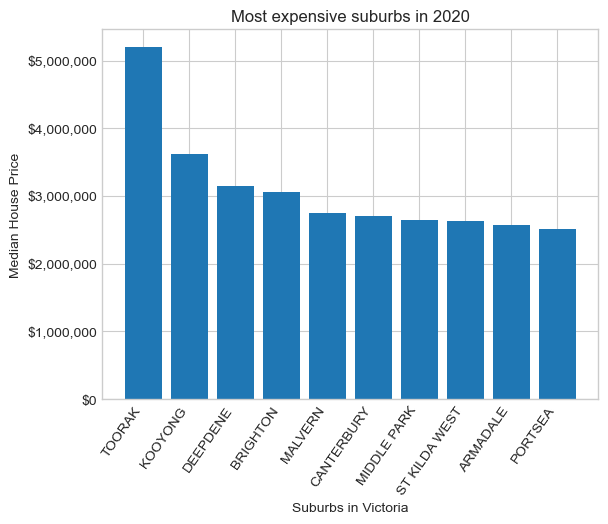

In [22]:
plt.style.use('seaborn-whitegrid')

from matplotlib import ticker
fig, ax = plt.subplots()
plt.bar(expensive_suburbs["Locality"], expensive_suburbs["2020"])
plt.xticks(expensive_suburbs["Locality"], rotation = 55, ha="right")
plt.xlabel("Suburbs in Victoria")
plt.ylabel("Median House Price")
plt.title("Most expensive suburbs in 2020")
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter("${x:,.0f}")





In [23]:
affordable_suburbs = house_prices.nsmallest(10,"2020").filter(["Locality","2020"])
affordable_suburbs

,Locality,2020
464,MINYIP,75000.0
575,RAINBOW,82000.0
598,RUPANYUP,90000.0
613,SEA LAKE,106500.0
350,JEPARIT,110000.0
359,KANIVA,115000.0
572,PYRAMID HILL,117500.0
542,OUYEN,121000.0
406,LEITCHVILLE,123500.0
172,COLERAINE,127000.0


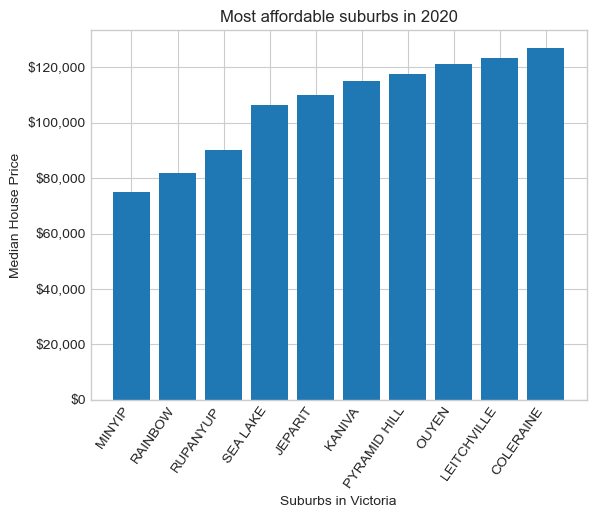

In [24]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()
plt.bar(affordable_suburbs["Locality"], affordable_suburbs["2020"])
plt.xticks(affordable_suburbs["Locality"], rotation = 55, ha="right")
plt.xlabel("Suburbs in Victoria")
plt.ylabel("Median House Price")
plt.title("Most affordable suburbs in 2020")
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter("${x:,.0f}")

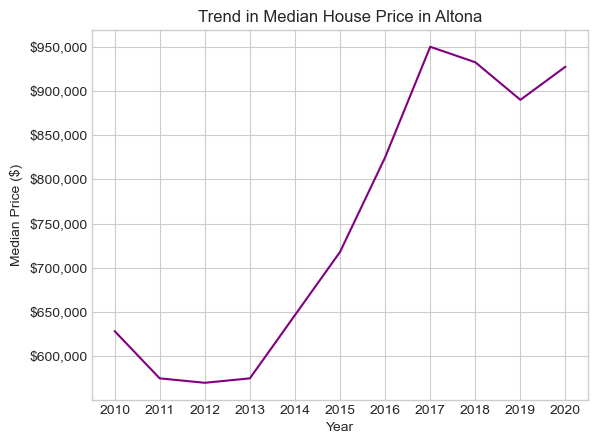

In [25]:
locality_list = list(house_prices["Locality"])
years = list(house_prices)[1:12]

plt.style.use('seaborn-whitegrid')
def city_pick(suburb):
    if suburb in locality_list:
        index = locality_list.index(suburb)
        suburb_prices = list(house_prices.iloc[index,1:12])
        fig, ax = plt.subplots()
        price_trend = plt.plot(years, suburb_prices, color="purple")
        formatter = ticker.ScalarFormatter()
        formatter.set_scientific(False)
        ax.yaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter("${x:,.0f}")
        plt.title("Trend in Median House Price in " + suburb.title())
        plt.xlabel("Year")
        plt.ylabel("Median Price ($)")
        
        
    return price_trend

suburb = input("Pick a suburb: ")
suburb = suburb.upper()
result = city_pick(suburb)
result

*Q. Which suburbs had the largest price increase between 2010 and 2020?*

In [26]:
hchange_suburbs = house_prices.nlargest(10, columns="% Change (2010-2020)")
hchange_suburbs

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA,First Nonzero Value
567,PORTLAND NORTH,115000.0,215000.0,226500.0,300000.0,248000.0,330000.0,340000.0,360000.0,367500.0,276000.0,507000.0,589500.0,84.0,341.0,16.0,115000.0
375,KILLARA (WODONGA),0.0,0.0,116500.0,351000.0,346000.0,360000.0,425000.0,400000.0,420000.0,453500.0,447500.0,469000.0,-1.0,284.0,14.4,116500.0
196,CURLEWIS,0.0,153000.0,439500.0,387000.0,382500.0,387000.0,406500.0,430000.0,495000.0,560000.0,570000.0,570000.0,2.0,273.0,14.1,153000.0
664,STRATHTULLOH,0.0,0.0,191000.0,350000.0,440000.0,425000.0,430000.0,359000.0,425000.0,507500.0,527500.0,556000.0,4.0,176.0,10.7,191000.0
267,FLINDERS,760000.0,822000.0,710000.0,765000.0,808000.0,839000.0,1225000.0,1525000.0,1697500.0,1670000.0,2085000.0,1825000.0,25.0,174.0,10.6,760000.0
536,OFFICER SOUTH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,283000.0,569500.0,714000.0,770000.0,535000.0,8.0,172.0,10.5,283000.0
21,ARMSTRONG CREEK,0.0,205000.0,362500.0,467500.0,441500.0,440000.0,450000.0,471000.0,535000.0,535000.0,555000.0,597500.0,4.0,171.0,10.5,205000.0
458,MICKLEHAM,0.0,0.0,0.0,213000.0,168000.0,385000.0,437000.0,500000.0,520000.0,525000.0,569000.0,595000.0,8.0,167.0,10.3,213000.0
354,KALKALLO,215000.0,375000.0,272500.0,450000.0,450000.0,180000.0,432500.0,529500.0,548000.0,538000.0,555000.0,590000.0,3.0,158.0,9.9,215000.0
262,FINGAL,515000.0,700000.0,600000.0,677500.0,730000.0,857500.0,840000.0,1000000.0,1350000.0,1240000.0,1312500.0,1602500.0,6.0,155.0,9.8,515000.0


Text(0.5, 1.0, 'Suburbs with the largest price change (2010-2020)')

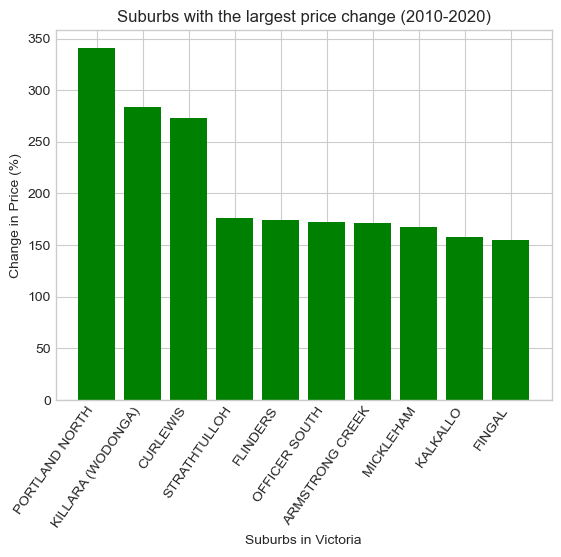

In [27]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots()
ax.bar(hchange_suburbs["Locality"], hchange_suburbs["% Change (2010-2020)"], color="g")
ax.set_xlabel("Suburbs in Victoria")
ax.set_xticks(hchange_suburbs["Locality"])
ax.set_xticklabels(hchange_suburbs["Locality"], rotation= 55, ha="right")
ax.set_ylabel("Change in Price (%)")
ax.set_title("Suburbs with the largest price change (2010-2020)")


In [28]:
#replace with nulls so the graph is more accurate
hchange_suburbs = hchange_suburbs.replace(0, np.nan)
hchange_suburbs

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA,First Nonzero Value
567,PORTLAND NORTH,115000.0,215000.0,226500.0,300000.0,248000.0,330000.0,340000.0,360000.0,367500.0,276000.0,507000.0,589500.0,84.0,341.0,16.0,115000.0
375,KILLARA (WODONGA),NaN,NaN,116500.0,351000.0,346000.0,360000.0,425000.0,400000.0,420000.0,453500.0,447500.0,469000.0,-1.0,284.0,14.4,116500.0
196,CURLEWIS,NaN,153000.0,439500.0,387000.0,382500.0,387000.0,406500.0,430000.0,495000.0,560000.0,570000.0,570000.0,2.0,273.0,14.1,153000.0
664,STRATHTULLOH,NaN,NaN,191000.0,350000.0,440000.0,425000.0,430000.0,359000.0,425000.0,507500.0,527500.0,556000.0,4.0,176.0,10.7,191000.0
267,FLINDERS,760000.0,822000.0,710000.0,765000.0,808000.0,839000.0,1225000.0,1525000.0,1697500.0,1670000.0,2085000.0,1825000.0,25.0,174.0,10.6,760000.0
536,OFFICER SOUTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283000.0,569500.0,714000.0,770000.0,535000.0,8.0,172.0,10.5,283000.0
21,ARMSTRONG CREEK,NaN,205000.0,362500.0,467500.0,441500.0,440000.0,450000.0,471000.0,535000.0,535000.0,555000.0,597500.0,4.0,171.0,10.5,205000.0
458,MICKLEHAM,NaN,NaN,NaN,213000.0,168000.0,385000.0,437000.0,500000.0,520000.0,525000.0,569000.0,595000.0,8.0,167.0,10.3,213000.0
354,KALKALLO,215000.0,375000.0,272500.0,450000.0,450000.0,180000.0,432500.0,529500.0,548000.0,538000.0,555000.0,590000.0,3.0,158.0,9.9,215000.0
262,FINGAL,515000.0,700000.0,600000.0,677500.0,730000.0,857500.0,840000.0,1000000.0,1350000.0,1240000.0,1312500.0,1602500.0,6.0,155.0,9.8,515000.0


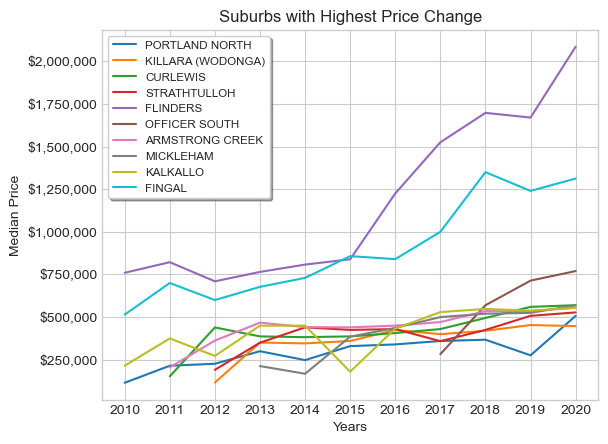

In [29]:
years = list(hchange_suburbs.columns[1:12])
nplots = range(len(hchange_suburbs))
hsuburbs = list(hchange_suburbs.iloc[:,0])
fig, ax = plt.subplots()
for graph in nplots:
    ax.plot(years, list(hchange_suburbs.iloc[graph, 1:12]), label=hsuburbs[graph])

ax.set_title("Suburbs with Highest Price Change")
ax.set_xlabel("Years")
ax.set_ylabel("Median Price")
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.legend(loc="upper left", fontsize="small", frameon=True, shadow=True)


*Q. Which suburbs had an overall price decrease between 2010 and 2020?*

In [30]:
lchange_suburbs = house_prices.where(house_prices["% Change (2010-2020)"] <0).dropna().sort_values(by="% Change (2010-2020)")
lchange_suburbs

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA,First Nonzero Value
598,RUPANYUP,129000.0,100000.0,127000.0,75000.0,105000.0,53500.0,75000.0,63500.0,87000.0,100500.0,90000.0,114500.0,-10.0,-30.0,-3.5,129000.0
695,THORNHILL PARK,0.0,0.0,0.0,0.0,0.0,0.0,720000.0,447000.0,530000.0,535000.0,550000.0,612500.0,3.0,-24.0,-2.7,720000.0
504,NELSON,266500.0,240000.0,205000.0,224000.0,203500.0,257500.0,220000.0,249500.0,255000.0,247500.0,210000.0,270000.0,-15.0,-21.0,-2.4,266500.0
464,MINYIP,85000.0,82500.0,81000.0,73500.0,95000.0,93000.0,82500.0,94000.0,81000.0,114500.0,75000.0,95000.0,-34.0,-12.0,-1.2,85000.0
142,CHARLEMONT,560000.0,560000.0,560000.0,560000.0,560000.0,560000.0,560000.0,157000.0,455000.0,465000.0,530000.0,525000.0,14.0,-5.0,-0.5,560000.0
572,PYRAMID HILL,122500.0,91000.0,100000.0,112500.0,117000.0,112500.0,112500.0,112500.0,100000.0,120000.0,117500.0,121500.0,-2.0,-4.0,-0.4,122500.0
385,KOONDROOK,239500.0,150000.0,165000.0,147500.0,155000.0,198500.0,165000.0,247500.0,268000.0,212500.0,234500.0,277500.0,10.0,-2.0,-0.2,239500.0
276,FRASER RISE,0.0,0.0,634500.0,455000.0,490000.0,465000.0,483000.0,540000.0,615000.0,595000.0,625000.0,640000.0,5.0,-1.0,-0.2,634500.0


Text(0.5, 1.0, 'Suburbs with an overall price decrease (2010-2020)')

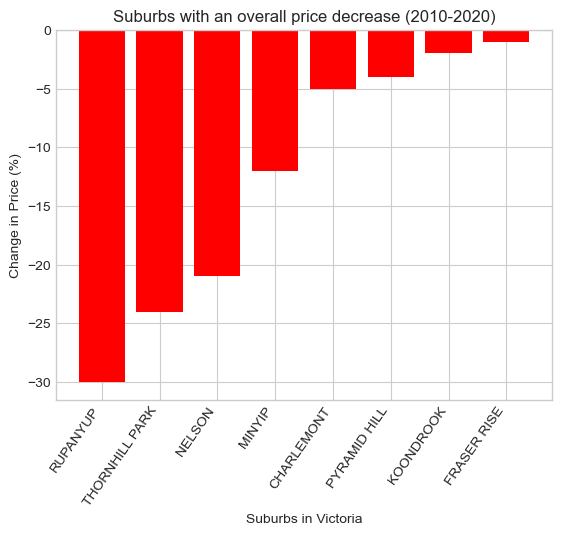

In [31]:
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots()
ax.bar(lchange_suburbs["Locality"], lchange_suburbs["% Change (2010-2020)"], color="r")
ax.set_xlabel("Suburbs in Victoria")
ax.set_xticks(lchange_suburbs["Locality"])
ax.set_xticklabels(lchange_suburbs["Locality"], rotation= 55, ha="right")
ax.set_ylabel("Change in Price (%)")
ax.set_title("Suburbs with an overall price decrease (2010-2020)")

In [32]:
lchange_suburbs = lchange_suburbs.replace(0, np.nan)
lchange_suburbs

,Locality,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Estimated 2021,% Change (2019-2020),% Change (2010-2020),Growth PA,First Nonzero Value
598,RUPANYUP,129000.0,100000.0,127000.0,75000.0,105000.0,53500.0,75000.0,63500.0,87000.0,100500.0,90000.0,114500.0,-10.0,-30.0,-3.5,129000.0
695,THORNHILL PARK,NaN,NaN,NaN,NaN,NaN,NaN,720000.0,447000.0,530000.0,535000.0,550000.0,612500.0,3.0,-24.0,-2.7,720000.0
504,NELSON,266500.0,240000.0,205000.0,224000.0,203500.0,257500.0,220000.0,249500.0,255000.0,247500.0,210000.0,270000.0,-15.0,-21.0,-2.4,266500.0
464,MINYIP,85000.0,82500.0,81000.0,73500.0,95000.0,93000.0,82500.0,94000.0,81000.0,114500.0,75000.0,95000.0,-34.0,-12.0,-1.2,85000.0
142,CHARLEMONT,560000.0,560000.0,560000.0,560000.0,560000.0,560000.0,560000.0,157000.0,455000.0,465000.0,530000.0,525000.0,14.0,-5.0,-0.5,560000.0
572,PYRAMID HILL,122500.0,91000.0,100000.0,112500.0,117000.0,112500.0,112500.0,112500.0,100000.0,120000.0,117500.0,121500.0,-2.0,-4.0,-0.4,122500.0
385,KOONDROOK,239500.0,150000.0,165000.0,147500.0,155000.0,198500.0,165000.0,247500.0,268000.0,212500.0,234500.0,277500.0,10.0,-2.0,-0.2,239500.0
276,FRASER RISE,NaN,NaN,634500.0,455000.0,490000.0,465000.0,483000.0,540000.0,615000.0,595000.0,625000.0,640000.0,5.0,-1.0,-0.2,634500.0


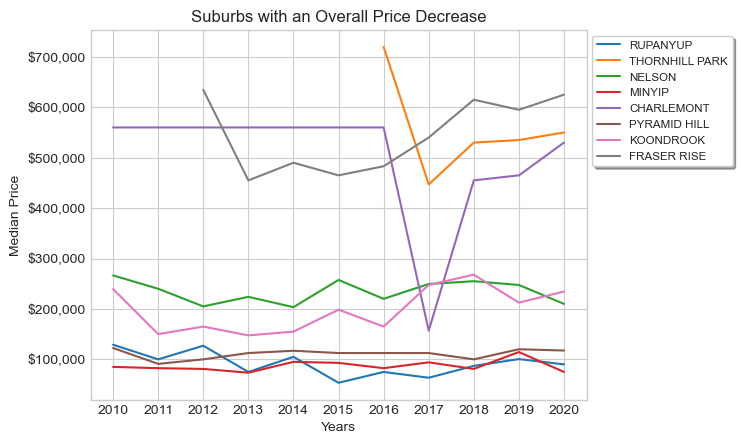

In [33]:
years = list(lchange_suburbs.columns[1:12])
nplots = range(len(lchange_suburbs))
lsuburbs = list(lchange_suburbs.iloc[:,0])
fig, ax = plt.subplots()
for graph in nplots:
    ax.plot(years, list(lchange_suburbs.iloc[graph, 1:12]), label=lsuburbs[graph])

ax.set_title("Suburbs with an Overall Price Decrease")
ax.set_xlabel("Years")
ax.set_ylabel("Median Price")
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.legend(loc="upper left", bbox_to_anchor=(1,1),fontsize="small", frameon=True, shadow=True)

Q. Trend in quarterly median prices and sales for top 5 suburbs in 2021

In [64]:
#adding the estimated 2021 median prices to find the top 5 most expensive suburbs

h2021 = house_prices_2021
h2020 = house_prices
h2021.set_index('SUBURB  ', inplace=True)
h2020.set_index("Locality", inplace=True)
h2021["2021"] = temp_2020["Estimated 2021"]

h2021


,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21,First Nonzero Value,No of Sales Jan-Mar 2021,2021
SUBURB,,,,,,,,,,,,,,
ABBOTSFORD,1230000.0,1370000.0,1470000.0,1107500.0,1340000.0,17.0,11.0,25.0,93.0,8.900000,21.000000,1230000.0,40.0,1375000.0
ABERFELDIE,1620000.0,1788000.0,1830000.0,1790000.0,2283000.0,11.0,8.0,18.0,68.0,40.900002,27.500000,1620000.0,31.0,1700000.0
AINTREE,687800.0,701500.0,695000.0,735000.0,742500.0,43.0,33.0,38.0,212.0,8.000000,1.000000,687800.0,98.0,717500.0
AIREYS INLET,1365000.0,1601000.0,1360000.0,1835000.0,2030000.0,5.0,8.0,7.0,38.0,48.700001,10.600000,1365000.0,18.0,1522000.0
AIRPORT WEST,830000.0,887500.0,955000.0,990000.0,1020000.0,43.0,30.0,35.0,180.0,22.900000,3.000000,830000.0,72.0,889500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YARRAM,300000.0,343000.0,340000.0,352500.0,420000.0,17.0,18.0,10.0,81.0,40.000000,19.100000,300000.0,36.0,343000.0
YARRAVILLE,1062500.0,1151500.0,1100000.0,1200000.0,1285000.0,59.0,52.0,101.0,353.0,20.900000,7.100000,1062500.0,141.0,1017500.0
YARRAWONGA,476300.0,540000.0,529000.0,597500.0,586000.0,65.0,36.0,57.0,273.0,23.000000,-1.900000,476300.0,115.0,539500.0


In [66]:
top3 = h2021.nlargest(3, columns="2021")
top3

,Oct - Dec 20,Jan - Mar 2021,Apr - Jun 2021,Jul-Aug 21,Oct - Dec 21,No of sales Apr - Jun 2021,No of sales Jul- Sep 2021,No of sales Oct - Dec 2021,No of Sales YTD,% Change Oct - Dec 20 Oct - Dec 21,% Change Jul-Aug 21 Oct - Dec 21,First Nonzero Value,No of Sales Jan-Mar 2021,2021
SUBURB,,,,,,,,,,,,,,
TOORAK,5000000.0,6475000.0,5575000.0,7150000.0,5200000.0,46.0,20.0,39.0,205.0,4.0,-27.299999,5000000.0,100.0,5800000.0
DEEPDENE,2685000.0,3480000.0,3042500.0,4194000.0,2731500.0,8.0,4.0,8.0,32.0,1.7,-34.900002,2685000.0,12.0,4500000.0
EAST MELBOURNE,3087500.0,3725000.0,4950000.0,1792500.0,2900000.0,3.0,2.0,5.0,24.0,-6.1,61.799999,3087500.0,14.0,3950000.0


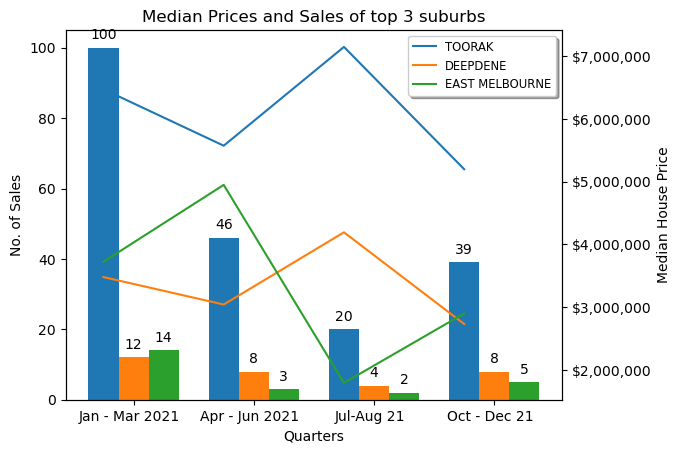

In [182]:
plt.style.use('default')

quarters = list(top3.columns[1:5])
ngraphs = range(len(top3))
topsub = list(top3.index)
squarters = list(top3.iloc[:, [12,5,6,7]].columns)

x = np.arange(len(squarters))
width = 0.25
multiplier = 0

fig,ax = plt.subplots()

ax2 = ax.twinx()
for bar in ngraphs:
    offset = width*multiplier
    rects = ax.bar(x+offset, list(top3.iloc[bar, [12,5,6,7]]), width, label=quarters)
    ax.bar_label(rects, padding=4)
    multiplier += 1    

for plot in ngraphs:
    ax2.plot(quarters, list(top3.iloc[plot, 1:5]), label= topsub[plot])


ax.grid(False)
ax2.yaxis.tick_right()
ax.yaxis.tick_left()

ax.set_title("Median Prices and Sales of top 3 suburbs")
ax.set_xlabel("Quarters")
ax.set_ylabel("No. of Sales")
ax2.set_ylabel("Median House Price")
ax.set_xticks(x+width, quarters)
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter("${x:,.0f}")
ax2.legend(loc="upper right", bbox_to_anchor=(1,1),fontsize="small", frameon=True, shadow=True)

Q. Which cities had the most sales in 2021?

In [191]:
topnsales = house_prices_2021.nlargest(5, columns="No of Sales  YTD").filter(["No of Sales  YTD"])
topnsales

,No of Sales YTD
SUBURB,
TRARALGON,934.0
TRUGANINA,910.0
FRANKSTON,909.0
SUNBURY,886.0
WOLLERT,879.0
